In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('display.width', 2000)

In [18]:

nucleus_df = pd.read_csv('csv/nuclei.csv')

In [19]:


# Filter the dataframe to include only neurons with 'CellType' neunPositive or neunPositiveLow
neun_positive_df = nucleus_df[((nucleus_df['CellType'] == 'neunPositive') | (nucleus_df['CellType'] == 'neunPositiveLow')) & (nucleus_df['Location'] != 'Undefined')]

# Group the filtered data by 'Location', 'Condition', and 'ImageName' to count the number of neurons in each region for each image and condition
neuron_counts = neun_positive_df.groupby(['Location', 'Condition', 'ImageName']).size().reset_index(name='NeuronCount')
print(neuron_counts)



   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          638
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          688
4       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          675
5       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          491
6       CA1      Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...          372
7       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          537
8       CA1      Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...          516
9       CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...          449
10      CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide

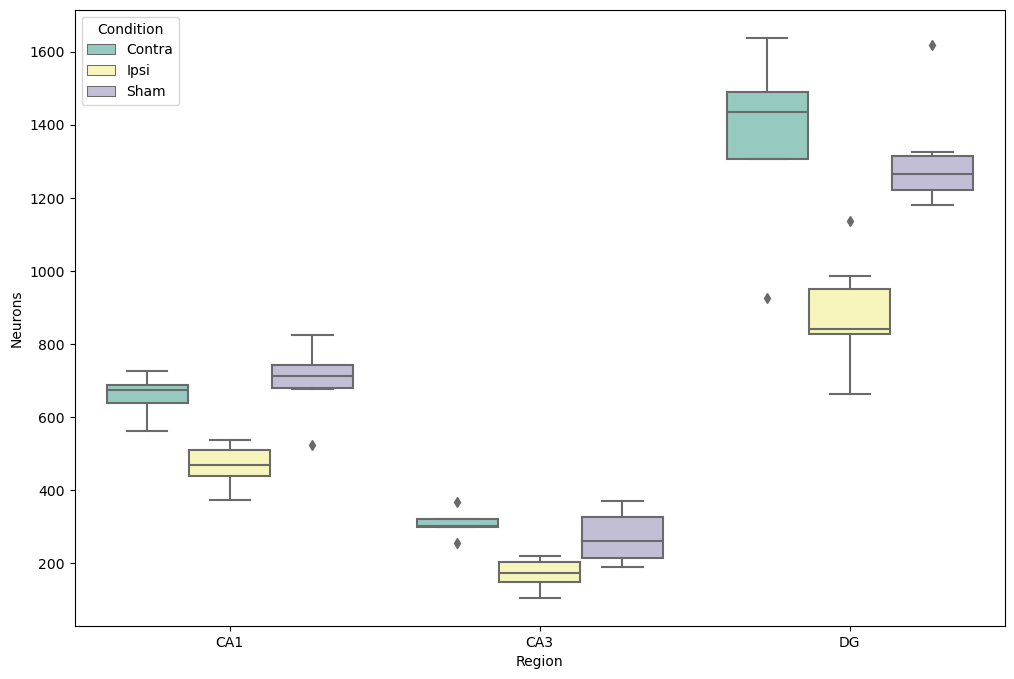

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Location', y='NeuronCount', hue='Condition', data=neuron_counts, palette='Set3')
plt.xlabel('Region')
plt.ylabel('Neurons')
plt.legend(title='Condition')
plt.show()

In [11]:
print(neuron_counts)

   Location Condition                                          ImageName  NeuronCount
0       CA1    Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          638
1       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
2       CA1    Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
3       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          688
4       CA1    Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          675
5       CA1      Ipsi  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...          638
6       CA1      Ipsi  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          563
7       CA1      Ipsi  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...          726
8       CA1      Ipsi  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          688
9       CA1      Ipsi  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...          675
10      CA1      Ipsi  HI 3 Ipsilateral Mouse 10 Slide

   Location Condition                                          ImageName  NeuronCount     CA1Volume     CA3Volume      DGVolume      Density
0       CA1      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...          739  1.943246e+06  1.370016e+06  1.354380e+06   380.291449
1       CA3      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...          337  1.943246e+06  1.370016e+06  1.354380e+06   245.982479
2        DG      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...         1325  1.943246e+06  1.370016e+06  1.354380e+06   978.307592
3       CA1      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...          825  1.464150e+06  7.736289e+05  8.680108e+05   563.466818
4       CA3      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...          299  1.464150e+06  7.736289e+05  8.680108e+05   386.490213
5        DG      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...         1212  1.464150e+06  7.736289e+05  8.680108e+05  1396.295937
6       CA1  

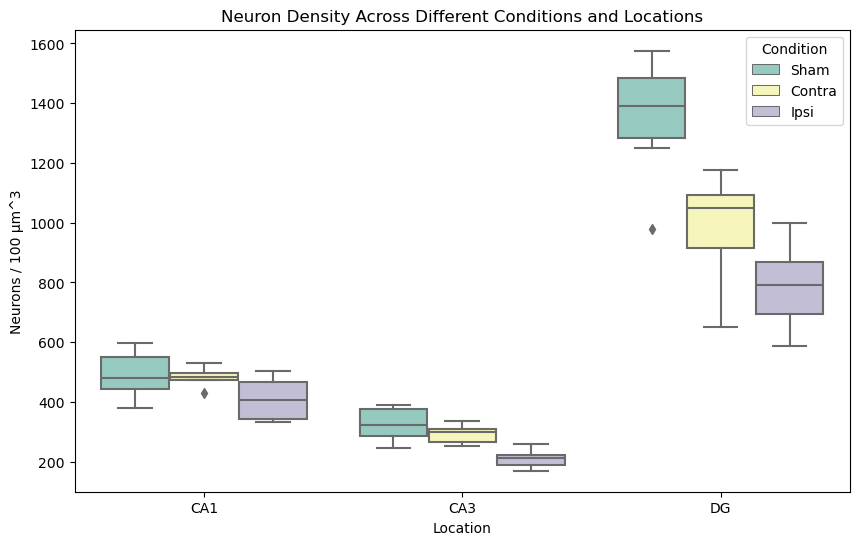

In [22]:
images_df = pd.read_csv("csv/images.csv")

# Merge the neuron counts with the volumes
contra_df = pd.merge(neuron_counts[neuron_counts['Condition'] == 'Contra'], images_df[['ImageName', 'CA1Volume', 'CA3Volume', 'DGVolume']], on='ImageName')
ipsi_df = pd.merge(neuron_counts[neuron_counts['Condition'] == 'Ipsi'], images_df[['ImageName', 'CA1Volume', 'CA3Volume', 'DGVolume']], on='ImageName')
sham_df = pd.merge(neuron_counts[neuron_counts['Condition'] == 'Sham'], images_df[['ImageName', 'CA1Volume', 'CA3Volume', 'DGVolume']], on='ImageName')

def calculate_density(row):
    location = row['Location']
    volume_column = f'{location}Volume'
    return (row['NeuronCount'] / row[volume_column]) * 10**6

# Apply the function to each row in the dataframe
contra_df['Density'] = contra_df.apply(calculate_density, axis=1)
ipsi_df['Density'] = ipsi_df.apply(calculate_density, axis=1)
sham_df['Density'] = sham_df.apply(calculate_density, axis=1)

condition_order = ['Sham', 'Contra', 'Ipsi']
# Concatenate the dataframes for all conditions
merged_df = pd.concat([contra_df, ipsi_df, sham_df])
print(merged_df[merged_df['Condition'] == 'Sham'])

# Create the figure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Density', hue='Condition', palette='Set3', hue_order=condition_order, data=merged_df)
plt.xlabel('Location')
plt.ylabel('Neurons / 100 \u03bcm^3')
plt.legend(title='Condition')
plt.show()